![](https://storage.googleapis.com/kaggle-datasets-images/3815527/6612067/b1f54cb83908bee51e3a2c4bbc542e49/dataset-cover.png?t=2023-10-05-00-22-08)

# About Dataset

## Description
Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a very crucial role in materials design in many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. In this study, I proposed a machine, or statistical, learning approach to predict hardness in naturally occurring materials, which integrates atomic and electronic features from composition directly across a wide variety of mineral compositions and crystal systems. First, atomic and electronic features from the composition, such as van der Waals and covalent radii as well as the number of valence electrons, were extracted from the composition.

In this study, the author trained a set of classifiers to understand whether compositional features can be used to predict the Mohs hardness of minerals of different chemical spaces, crystal structures, and crystal classes. The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in the Physical and Optical Properties of Minerals CRC Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database. The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. An independent dataset was compiled to validate the model performance. The validation dataset contains the composition, crystal structure, and Mohs hardness values of 51 synthetic single crystals reported in the literature. The validation dataset includes 15 monoclinic, 7 tetragonal, 7 hexagonal, 6 orthorhombic, 4 cubic, and 3 rhombohedral crystal structures.

In this study, the author constructed a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45. This comprehensive compositional-based dataset allows us to train models that are able to predict hardness across a wide variety of mineral compositions and crystal classes. Each material in both the naturally occurring mineral and artificial single crystal datasets was represented by 11 atomic descriptors. The elemental features are the number of electrons, number of valence electrons, atomic number, Pauling electronegativity of the most common oxidation state, covalent atomic radii, van der Waals radii, and ionization energy of neutral.

# IMPORT

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


# Prepare data 

# Explore

In [2]:
df = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [3]:
df

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8
10405,10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755,6.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


<Axes: >

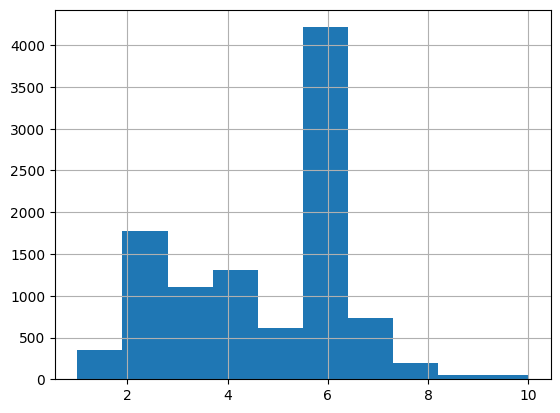

In [5]:
# Target Distrpution
df['Hardness'].hist()

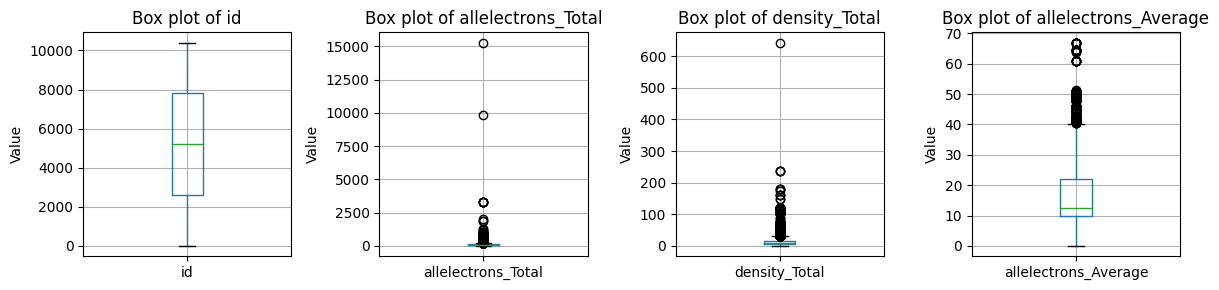

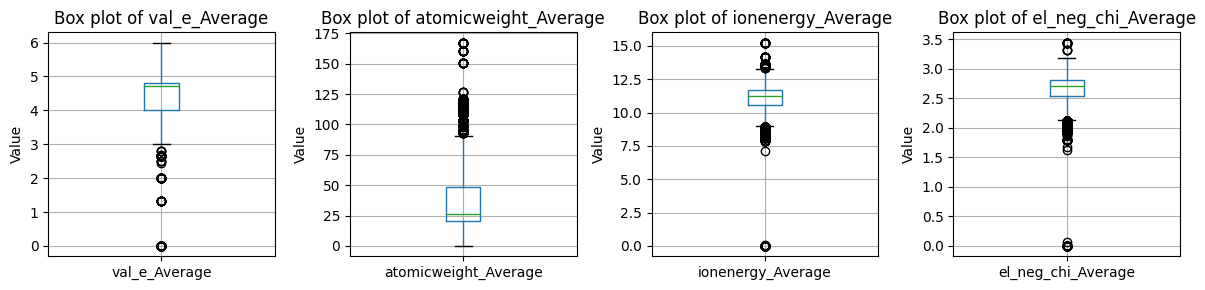

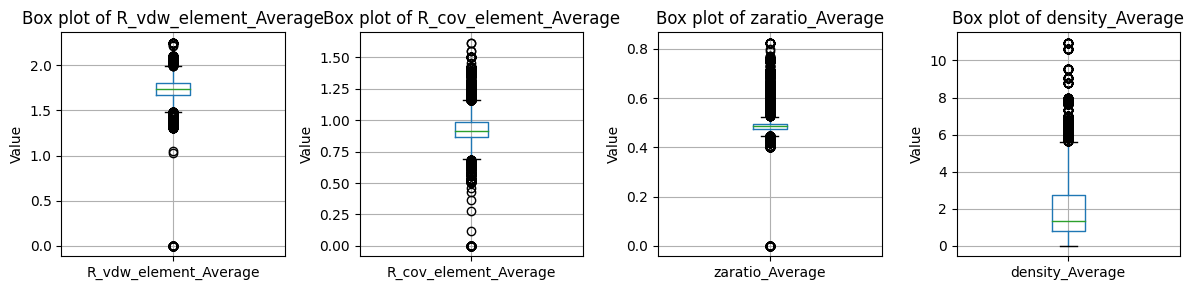

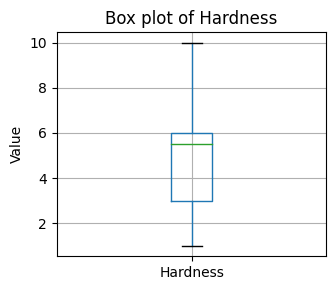

In [6]:
# Create box plots for numerical columns
numerical_cols = df.select_dtypes(include='number').columns
num_plots = len(numerical_cols)
num_cols_per_row = 4  # Number of box plots per row

for i in range(0, num_plots, num_cols_per_row):
    plt.figure(figsize=(12, 3))  # Adjust the overall figure size here
    for j in range(num_cols_per_row):
        if i + j < num_plots:
            plt.subplot(1, num_cols_per_row, j+1)
            df.boxplot(column=numerical_cols[i + j])
            plt.title(f'Box plot of {numerical_cols[i + j]}')
            plt.ylabel('Value')
    plt.tight_layout()  # Adjust the layout
    plt.show()

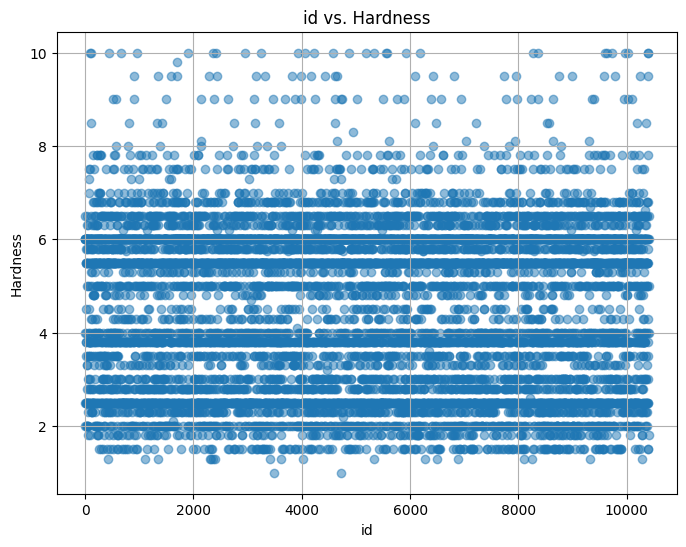

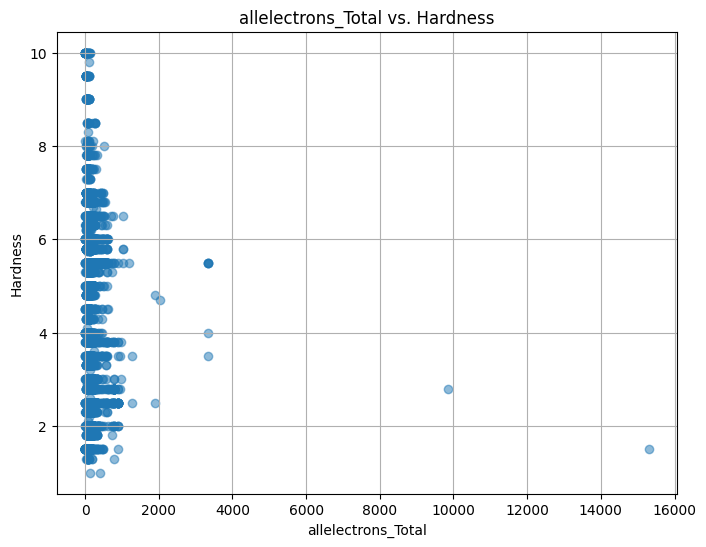

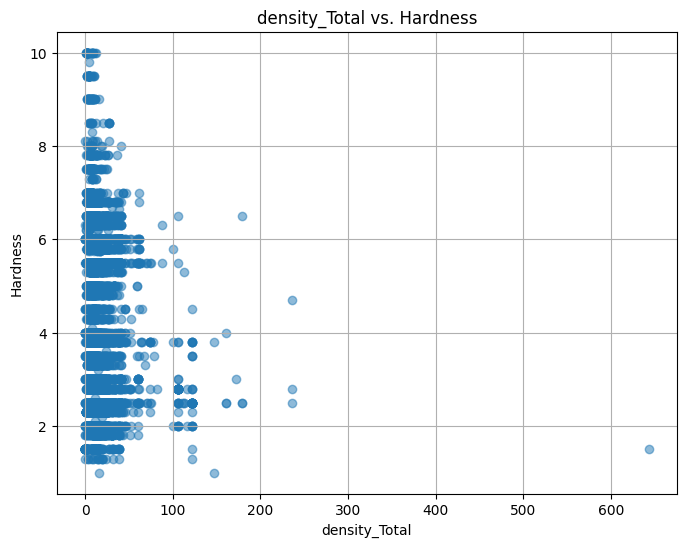

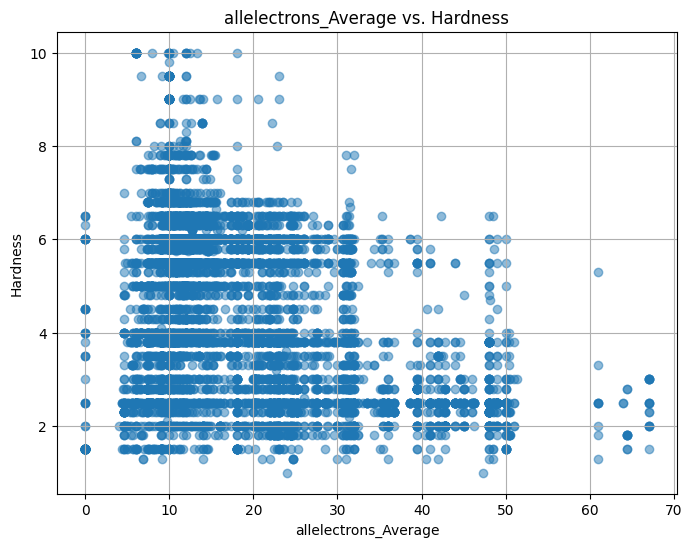

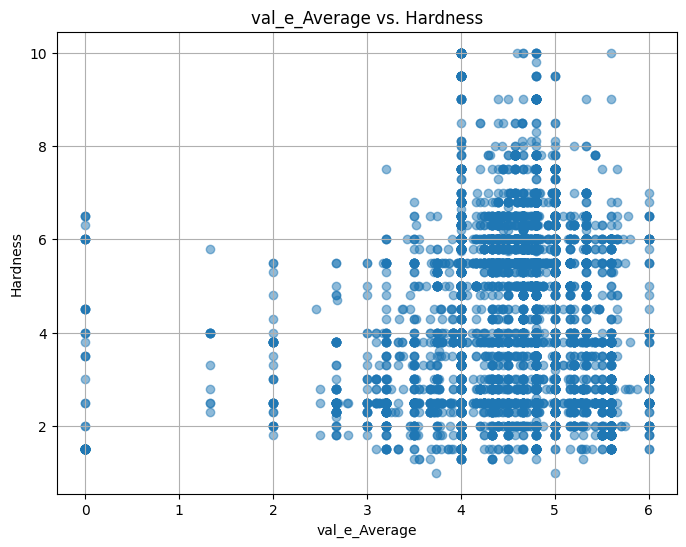

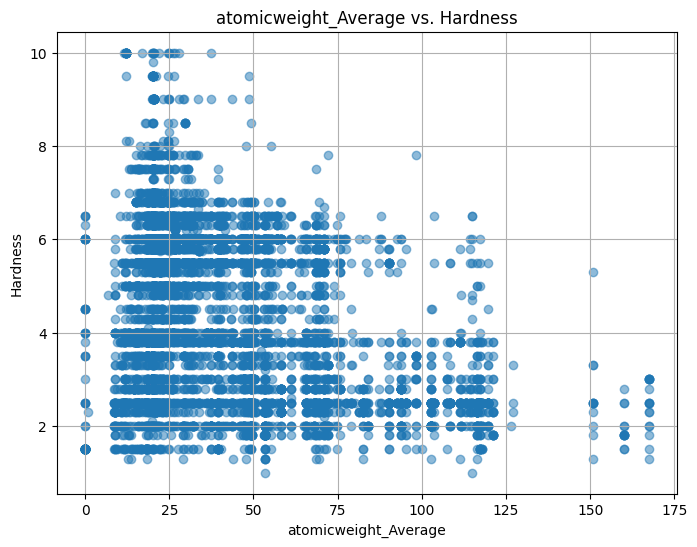

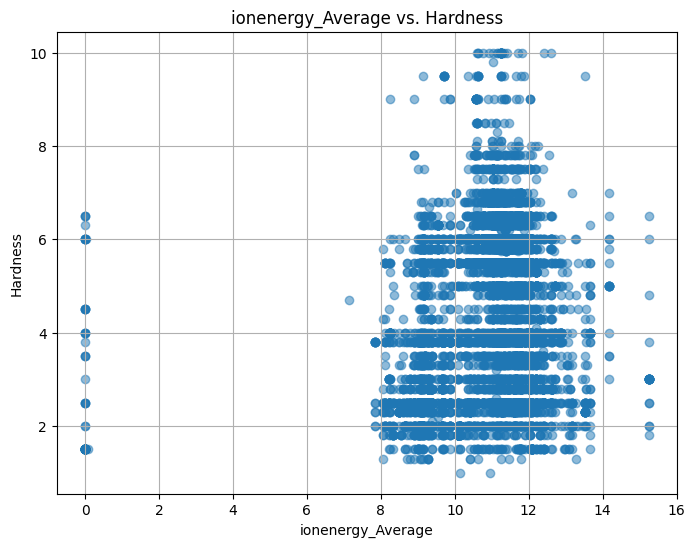

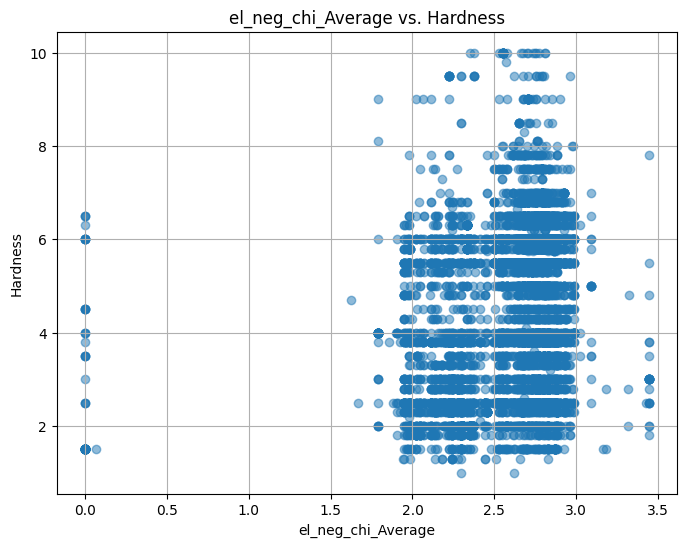

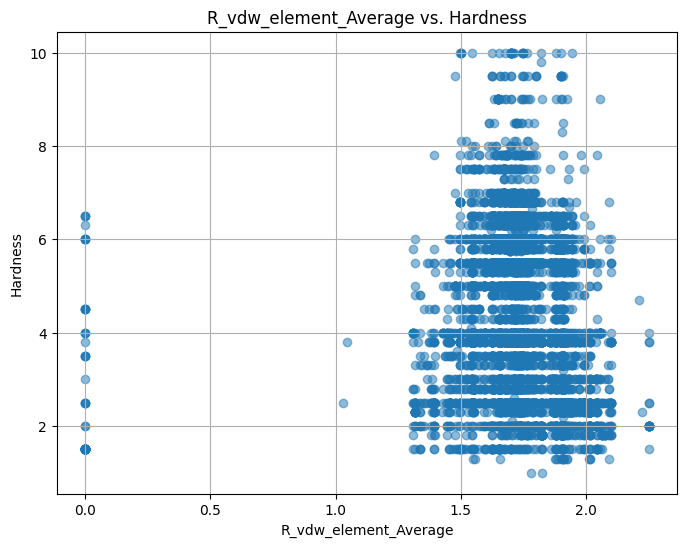

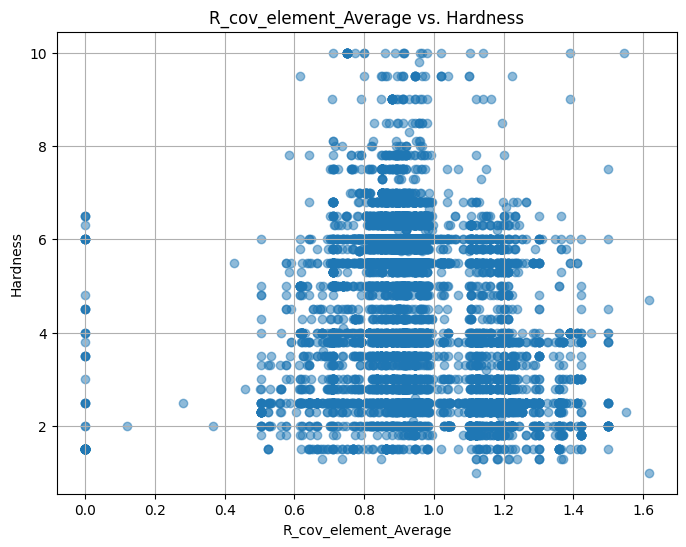

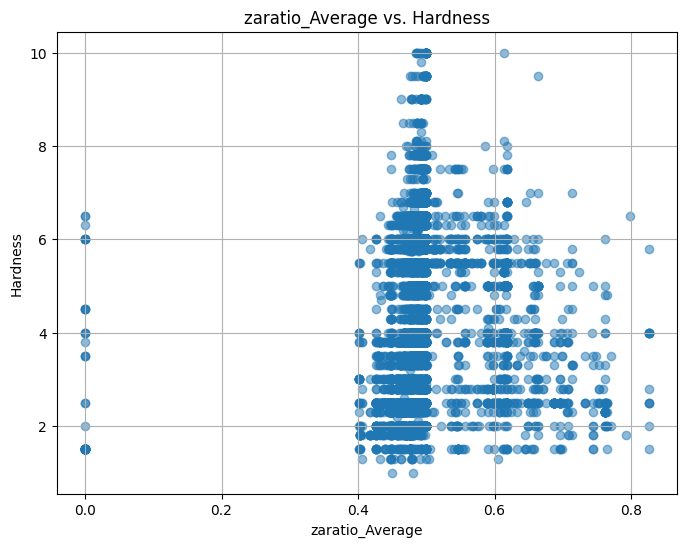

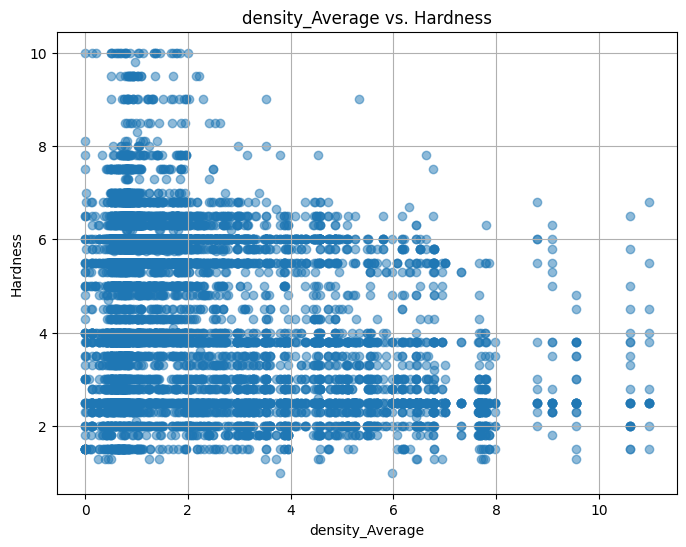

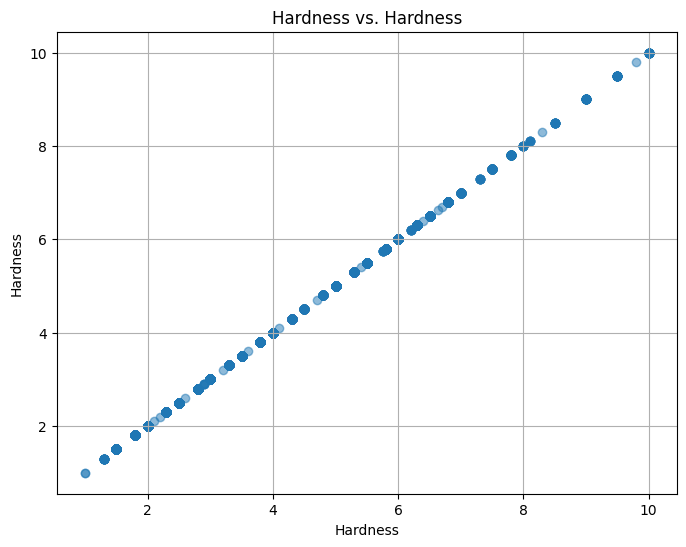

In [7]:
# Select numerical features and target variable
numerical_cols = df.select_dtypes(include='number').columns
target_col = 'Hardness'  # Assuming 'hardness' is the target variable

# Create scatter plots for numerical features vs. target variable
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df[target_col], alpha=0.5)
    plt.title(f'{col} vs. {target_col}')
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.grid(True)
    plt.show()

In [8]:
df.corr()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,1.000000,-0.019038,-0.005849,0.001863,-0.003501,0.002035,-0.019492,-0.015554,-0.003115,0.003888,-0.013690,0.006337,-0.006989
allelectrons_Total,-0.019038,1.000000,0.616092,0.074725,0.071618,0.078489,0.034883,0.036897,0.038551,0.024420,0.031035,0.058067,-0.061687
density_Total,-0.005849,0.616092,1.000000,0.356399,0.083640,0.355614,-0.104870,-0.075535,0.202331,0.240787,-0.089792,0.336046,-0.161524
allelectrons_Average,0.001863,0.074725,0.356399,1.000000,0.004376,0.990660,-0.360046,-0.319413,0.550669,0.688680,-0.328973,0.803641,-0.400496
val_e_Average,-0.003501,0.071618,0.083640,0.004376,1.000000,0.001860,0.453901,0.550007,0.354538,0.189352,0.093854,-0.068899,0.161715
atomicweight_Average,0.002035,0.078489,0.355614,0.990660,0.001860,1.000000,-0.356640,-0.316053,0.529277,0.666165,-0.327459,0.796564,-0.402948
ionenergy_Average,-0.019492,0.034883,-0.104870,-0.360046,0.453901,-0.356640,1.000000,0.774050,0.078650,-0.235344,0.638616,-0.359735,0.203203
el_neg_chi_Average,-0.015554,0.036897,-0.075535,-0.319413,0.550007,-0.316053,0.774050,1.000000,0.121926,-0.174485,0.441195,-0.322099,0.290352
R_vdw_element_Average,-0.003115,0.038551,0.202331,0.550669,0.354538,0.529277,0.078650,0.121926,1.000000,0.811823,0.002984,0.439990,-0.061402
R_cov_element_Average,0.003888,0.024420,0.240787,0.688680,0.189352,0.666165,-0.235344,-0.174485,0.811823,1.000000,-0.221164,0.571741,-0.189111


In [9]:
df.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


In [10]:
# merge df and test 
len_test = len(test)
df_main = pd.concat([df,test])
len_test

6939

In [11]:
df_main

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548,NaN
6935,17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045,NaN
6936,17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425,NaN
6937,17344,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227,NaN


# Feature Engineering

In [12]:
def prep(df):
    df=df.drop(columns='id')
    # 1. Polynomial Features
    df_poly = df.copy()
    df_poly = df_poly.drop(columns=['Hardness'])  # Drop the target variable
    for column in df.columns:
        df_poly[f"{column}_squared"] = df[column] ** 2
        df_poly[f"{column}_cubed"] = df[column] ** 3

    # 2. Interaction Terms
    df_interaction = df.copy()
    df_interaction = df_interaction.drop(columns=['Hardness'])
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                df_interaction[f"{col1}_x_{col2}"] = df[col1] * df[col2]

    # 3. Ratio Features
    df_ratio = df.copy()
    df_ratio = df_ratio.drop(columns=['Hardness'])
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2:
                df_ratio[f"{col1}_over_{col2}"] = df[col1] / (df[col2] + 1e-6)  # Avoid division by zero

    # 4. Logarithmic or Exponential Transformations
    df_log_exp = df.copy()
    df_log_exp = df_log_exp.drop(columns=['Hardness'])
    for column in df.columns:
        df_log_exp[f"log_{column}"] = df[column].apply(lambda x: np.log(x + 1e-6))  # Adding a small value to avoid log(0)

    # 5. Statistical Aggregates
    df_agg = df.copy()
    df_agg = df_agg.drop(columns=['Hardness'])
    agg_funcs = ['mean', 'std', 'min', 'max']
    for agg_func in agg_funcs:
        df_agg[f"{agg_func}_aggregate"] = df.agg(agg_func, axis=1)

    # Concatenate all the engineered feature DataFrames along columns
    final_df = pd.concat([df, df_poly, df_interaction, df_ratio, df_log_exp, df_agg], axis=1)
                         
                         
                         
    # Drop target leakeage features 
    final_df = final_df.drop(columns=['Hardness_squared', 'Hardness_cubed',
       'val_e_Average_x_Hardness', 'ionenergy_Average_x_Hardness',
       'el_neg_chi_Average_x_Hardness', 'R_vdw_element_Average_x_Hardness',
       'R_cov_element_Average_x_Hardness', 'zaratio_Average_x_Hardness',
       'Hardness_x_val_e_Average', 'Hardness_x_ionenergy_Average',
       'Hardness_x_el_neg_chi_Average', 'Hardness_x_R_vdw_element_Average',
       'Hardness_x_R_cov_element_Average', 'Hardness_x_zaratio_Average',
       'allelectrons_Average_over_Hardness', 'val_e_Average_over_Hardness',
       'atomicweight_Average_over_Hardness', 'ionenergy_Average_over_Hardness',
       'el_neg_chi_Average_over_Hardness',
       'R_vdw_element_Average_over_Hardness',
       'R_cov_element_Average_over_Hardness', 'zaratio_Average_over_Hardness',
       'density_Average_over_Hardness', 'log_Hardness'])
    
    
    # remove Dublicated columns 
    
    
    duplicated_columns = final_df.columns[final_df.columns.duplicated()]

    # Drop duplicated columns
    final_df = final_df.drop(columns=duplicated_columns)

    # Now final_df contains all the engineered features along with the original features and the target variable
    return final_df


In [13]:
final_df = prep(df_main)

In [14]:
final_df

,Hardness,allelectrons_Total_squared,allelectrons_Total_cubed,density_Total_squared,density_Total_cubed,allelectrons_Average_squared,allelectrons_Average_cubed,val_e_Average_squared,val_e_Average_cubed,atomicweight_Average_squared,...,log_ionenergy_Average,log_el_neg_chi_Average,log_R_vdw_element_Average,log_R_cov_element_Average,log_zaratio_Average,log_density_Average,mean_aggregate,std_aggregate,min_aggregate,max_aggregate
0,6.0,10000.0,1000000.0,0.708309,0.596121,100.000000,1000.000000,23.040000,110.592000,424.876216,...,2.405873,1.017403,0.549277,-0.150822,-0.701036,-0.089300,13.342573,27.934586,0.496070,100.0000
1,6.5,10000.0,1000000.0,57.130741,431.822019,100.000000,1000.000000,23.040000,110.592000,412.045042,...,2.488303,1.013418,0.489194,-0.094310,-0.707814,-0.331842,13.975377,27.712074,0.492719,100.0000
2,2.5,5776.0,438976.0,78.960854,701.645515,243.360000,3796.416000,31.360000,175.616000,1138.337530,...,2.492073,1.039570,0.581098,-0.146181,-0.730893,0.409677,13.489947,21.848747,0.481478,76.0000
3,6.0,10000.0,1000000.0,77.357232,680.379751,100.000000,1000.000000,23.040000,110.592000,408.579469,...,2.393203,0.973805,0.486124,-0.066139,-0.714835,-0.236519,13.937149,27.708403,0.489272,100.0000
4,6.0,13456.0,1560896.0,91.738007,878.666268,134.560000,1560.896000,23.040000,110.592000,624.406798,...,2.470172,1.017403,0.519984,-0.109814,-0.707780,0.623160,16.041013,32.238877,0.492736,116.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,NaN,198916.0,88716536.0,1305.766537,47184.385346,92.859504,894.827949,21.495868,99.662660,387.674368,...,2.402025,1.018355,0.570809,-0.137173,-0.695744,-2.158649,48.469765,132.293280,0.115480,446.0000
6935,NaN,1296.0,46656.0,12.602500,44.738875,324.000000,5832.000000,16.000000,64.000000,1300.936692,...,2.108588,0.582216,0.720276,0.329304,-0.695147,0.300439,10.267232,13.672001,0.499000,36.0685
6936,NaN,4624.0,314432.0,20.660007,93.906507,128.444444,1455.703704,28.444444,151.703704,514.784066,...,2.392276,1.056633,0.538441,-0.087010,-0.694999,-0.308904,11.779927,19.805015,0.499074,68.0000
6937,NaN,1600.0,64000.0,5.448319,12.717268,44.444444,296.296296,16.000000,64.000000,169.419597,...,2.541639,1.018848,0.389788,-0.483425,-0.409778,-0.668901,7.705166,11.638237,0.512270,40.0000


In [15]:
def drop_low_corr_features(df, target_column, threshold=0.5):
    
    # Compute correlations with the target variable
    corr_values = df.corr()[target_column].abs().sort_values(ascending=False)

    # Drop features with low correlation values
    low_corr_features = corr_values[corr_values < threshold].index.tolist()
    columns=low_corr_features

    return columns

low_corr_features = drop_low_corr_features(final_df, 'Hardness', threshold=0.4)

In [16]:
final_df = final_df.drop(columns=low_corr_features)

In [17]:
final_df.shape

(17346, 14)

# Split

In [18]:
len = 17346 - len_test

In [19]:
df_new = final_df.iloc[:len]
test_new = final_df.iloc[len:]

In [20]:
target = 'Hardness'
y = df_new.pop(target)
X = df_new

# Model

In [21]:
import optuna
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Define objective function for Optuna
def objective(trial):
    # Define hyperparameters to search
    param = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
    }
    
    # Initialize XGBoost regressor with the suggested parameters
    xgb = XGBRegressor(**param)
    
    # Fit the model on training data
    xgb.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = xgb.predict(X_valid)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
    
    return rmse

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Perform hyperparameter optimization using Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best trial and parameters found
print("Best trial:")
best_trial = study.best_trial
print(f"  Value: {best_trial.value}")
print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Use the best parameters to train the final model
best_params = best_trial.params
xgb_best = XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = xgb_best.predict(X_test)

# Calculate RMSE on the test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


[I 2024-02-10 20:07:18,302] A new study created in memory with name: no-name-31cca80f-9a23-4138-9f49-1c859789d82a
[I 2024-02-10 20:07:20,468] Trial 0 finished with value: 1.3366271088336443 and parameters: {'n_estimators': 503, 'max_depth': 10, 'learning_rate': 0.06939910984157129, 'subsample': 0.6757446872466294, 'colsample_bytree': 0.6536961640649304, 'reg_alpha': 9.239974747069136, 'reg_lambda': 1.3114009734859144}. Best is trial 0 with value: 1.3366271088336443.
[I 2024-02-10 20:07:24,599] Trial 1 finished with value: 1.373102414627688 and parameters: {'n_estimators': 804, 'max_depth': 9, 'learning_rate': 0.06811344395410644, 'subsample': 0.9348930973875409, 'colsample_bytree': 0.9819244243563485, 'reg_alpha': 2.7107984449237463, 'reg_lambda': 7.014405007732355}. Best is trial 0 with value: 1.3366271088336443.
[I 2024-02-10 20:07:25,082] Trial 2 finished with value: 1.2977945940590832 and parameters: {'n_estimators': 513, 'max_depth': 3, 'learning_rate': 0.07033612115043002, 'subsa

Best trial:
  Value: 1.2870622562532807
  Params: 
    n_estimators: 471
    max_depth: 4
    learning_rate: 0.030658775305389713
    subsample: 0.9998566121939978
    colsample_bytree: 0.915354761339301
    reg_alpha: 3.3168823206062554
    reg_lambda: 2.380651477730635
Test RMSE: 1.3056816075204867


<Figure size 1000x600 with 0 Axes>

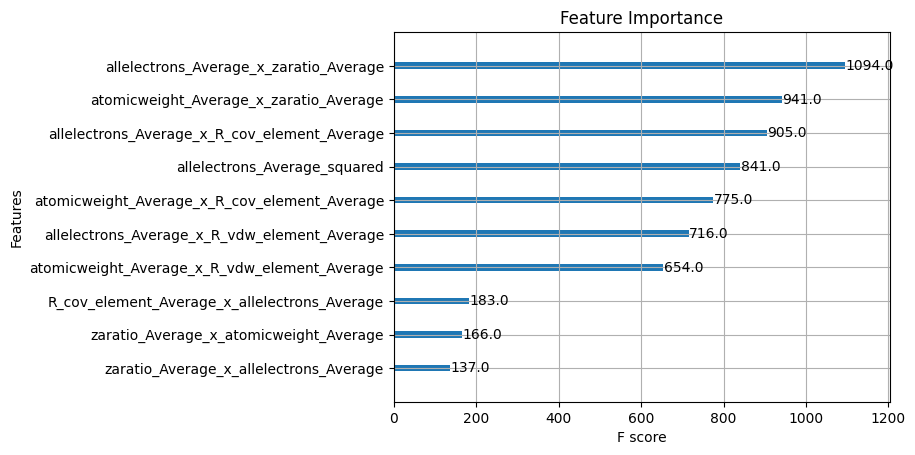

In [22]:
from xgboost import plot_importance

# Assuming xgb_best is your trained XGBoost model
# Plot feature importance
plt.figure(figsize=(10, 6))
plot_importance(xgb_best, max_num_features=10)  # Adjust max_num_features as needed
plt.title("Feature Importance")
plt.show()

# Submission

In [23]:
test_new = test_new.reset_index()

In [24]:
test_new = test_new.drop(columns='index')

In [25]:
test_new = test_new.drop(columns='Hardness')

In [26]:
df_sub = test[['id']]
pred = xgb_best.predict(test_new)
pred = np.squeeze(pred)
df_sub['Hardness'] = pred
# Display the first few rows of the submission DataFrame
df_sub.head()

,id,Hardness
0,10407,2.731023
1,10408,3.173068
2,10409,5.577517
3,10410,5.502761
4,10411,5.360048


In [27]:
# Add predictions
df_sub.to_csv("submission.csv",index=False)